In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_excel('Airlines+Data.xlsx', header=0,index_col=0,parse_dates=True)
data.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


In [3]:
data.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96 entries, 1995-01-01 to 2002-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  96 non-null     int64
dtypes: int64(1)
memory usage: 1.5 KB


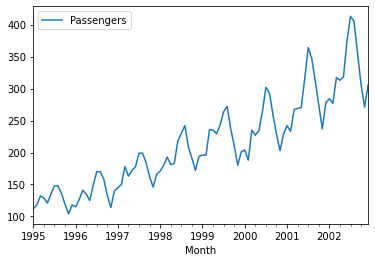

In [5]:
#line plot
data.plot()
plt.show()

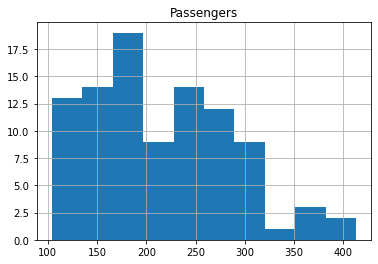

In [6]:
#histogram
data.hist()
plt.show()

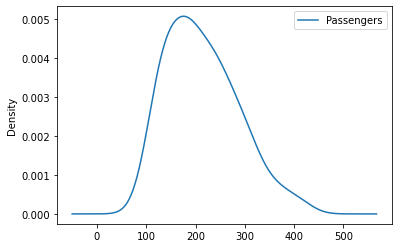

In [7]:
data.plot(kind='kde')
plt.show()

In [8]:
#Box and Whisker Plots by Interval

from pandas import DataFrame
from pandas import Grouper
data=pd.read_excel('Airlines+Data.xlsx',header=0,index_col=0,parse_dates=True,squeeze=True)

In [9]:
groups =data.groupby(Grouper(freq='A'))
years = DataFrame()


In [10]:
data

Month
1995-01-01    112
1995-02-01    118
1995-03-01    132
1995-04-01    129
1995-05-01    121
             ... 
2002-08-01    405
2002-09-01    355
2002-10-01    306
2002-11-01    271
2002-12-01    306
Name: Passengers, Length: 96, dtype: int64

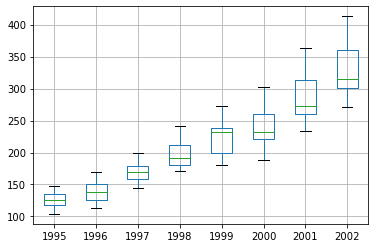

In [11]:
for name, group in groups:
    years[name.year] = group.values
years.boxplot()
plt.show()

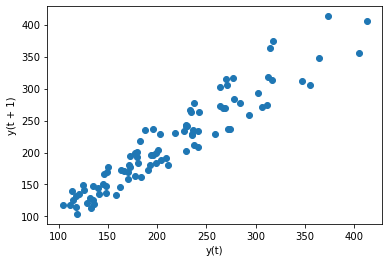

In [12]:
#lag plot

from pandas.plotting import lag_plot
lag_plot(data)
plt.show()

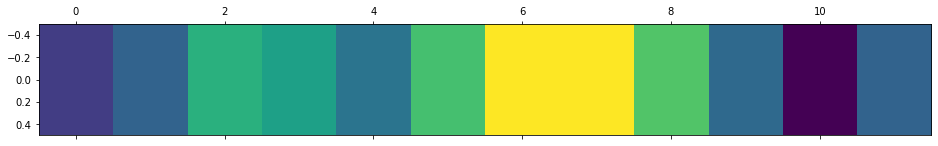

In [14]:
#heatmap
one_year = data['1995']
groups = one_year.groupby(Grouper(freq='M'))
months = pd.concat([pd.DataFrame(x[1].values) for x in groups], axis=1)
months = pd.DataFrame(months)
months.columns = range(1,13)
plt.matshow(months, interpolation=None, aspect='auto')
plt.show()

#Time series decomposition plot

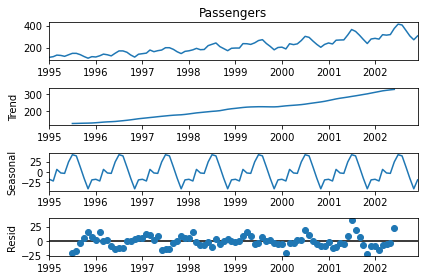

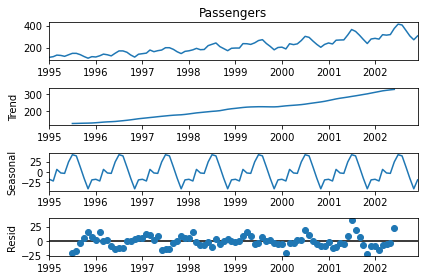

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose
data=pd.read_excel('Airlines+Data.xlsx',header=0,index_col=0,parse_dates=True)
decompose=seasonal_decompose(data['Passengers'],model='additive')
decompose.plot()

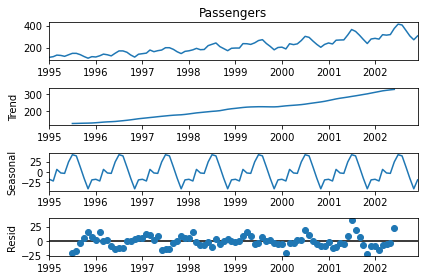

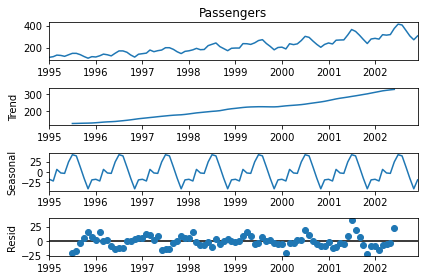

In [16]:
decompose2=seasonal_decompose(data['Passengers'],model='multiplicative')
decompose.plot()

### Test Train Split

In [17]:
data.shape

(96, 1)

In [18]:
data.shape[0]

96

In [19]:
train_size = int(data.shape[0]*0.8)   ## 80% is for train and 20% is for test
train_size

76

In [20]:
train=data[0:train_size]
train

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2000-12-01,229
2001-01-01,242
2001-02-01,233


In [21]:
test=data[train_size:]
test

,Passengers
Month,
2001-05-01,270
2001-06-01,315
2001-07-01,364
2001-08-01,347
2001-09-01,312
2001-10-01,274
2001-11-01,237
2001-12-01,278
2002-01-01,284


In [22]:
train.shape

(76, 1)

In [23]:
test.shape

(20, 1)

## Naive method

In [24]:
data=pd.read_excel('Airlines+Data.xlsx',header=0,index_col=0,parse_dates=True)

In [25]:
#Creating a new dataframe by copying the test data
# Because we will forecast the last two years data and comapre the forecast in this new coppied dataframe.
y_hat_naive = test.copy()
y_hat_naive.head()

,Passengers
Month,
2001-05-01,270
2001-06-01,315
2001-07-01,364
2001-08-01,347
2001-09-01,312


In [26]:
# Assigning the last value of the train set (December 1958 value) to all the test data records
y_hat_naive['naive_forecast'] = data['Passengers'].shift(1)

In [27]:
y_hat_naive

,Passengers,naive_forecast
Month,,
2001-05-01,270,269.0
2001-06-01,315,270.0
2001-07-01,364,315.0
2001-08-01,347,364.0
2001-09-01,312,347.0
2001-10-01,274,312.0
2001-11-01,237,274.0
2001-12-01,278,237.0
2002-01-01,284,278.0


In [28]:
train, test = data[1:76], data[76:]

In [29]:
y_hat_naive.head()

,Passengers,naive_forecast
Month,,
2001-05-01,270,269.0
2001-06-01,315,270.0
2001-07-01,364,315.0
2001-08-01,347,364.0
2001-09-01,312,347.0


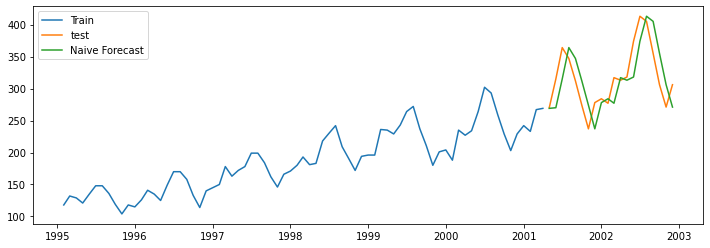

In [30]:
#Plot train, test and forecast data
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='test')
plt.plot(y_hat_naive['naive_forecast'], label='Naive Forecast')
plt.legend(loc='best')
plt.show()

### Calculate RMSE and MAPE Error for Naive method

In [31]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_naive['naive_forecast'])).round(2)
rmse

34.81

In [32]:
mape = round(np.mean(np.abs((test['Passengers'] - y_hat_naive['naive_forecast'])/test['Passengers'])*100),2)
mape

9.47

In [33]:
results = pd.DataFrame({'Method':['Naive method'], 'RMSE':[rmse], 'MAPE':[mape]})
results

,Method,RMSE,MAPE
0,Naive method,34.81,9.47


# Simple moving average method

In [34]:
# We are copying entire data because we want to see the forecast for the entire dataset (train and test)
y_hat_sma = data.copy()

In [35]:
# Moving average window. We will take the avg of last 12 months for forecasting the future. 
ma_window = 12

In [36]:
# Rolling function calculated the last number of records
y_hat_sma['sma_forecast'] = data['Passengers'].rolling(ma_window).mean()

In [37]:
y_hat_sma

,Passengers,sma_forecast
Month,,
1995-01-01,112,NaN
1995-02-01,118,NaN
1995-03-01,132,NaN
1995-04-01,129,NaN
1995-05-01,121,NaN
...,...,...
2002-08-01,405,316.833333
2002-09-01,355,320.416667
2002-10-01,306,323.083333


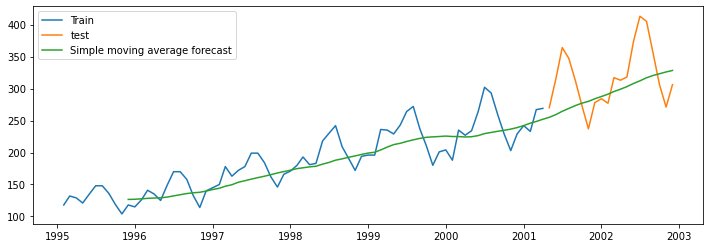

In [38]:
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='test')
plt.plot(y_hat_sma['sma_forecast'], label='Simple moving average forecast')
plt.legend(loc='best')
plt.show()

### calculate RMSE and MAPE

In [39]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_sma['sma_forecast'][train_size:])).round(2)
rmse

50.58

In [40]:
mape = round(np.mean(np.abs((test['Passengers'] - y_hat_sma['sma_forecast'][train_size:])/test['Passengers'])*100),2)
mape

11.8

In [41]:
results = results.append({'Method':'Simple moving average method', 'RMSE':rmse, 'MAPE':mape}, ignore_index=True)
results

,Method,RMSE,MAPE
0,Naive method,34.81,9.47
1,Simple moving average method,50.58,11.80


# Stationary vs Non-stationary Time Series

### Visually checking the Stationarity

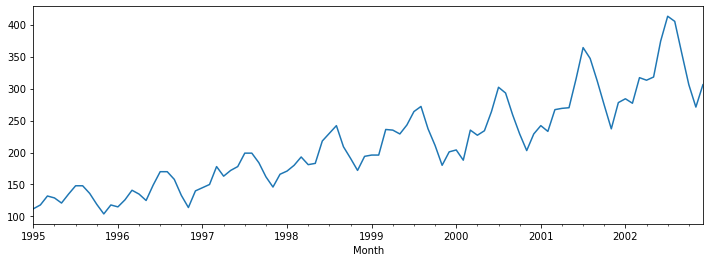

In [42]:
data['Passengers'].plot(figsize=(12,4))
plt.show()

In [ ]:
# in the above graph,We can see that there is an increasing Trend. So, Trend is not constant.
#Variance is also not constant.

### using Augmented Dickey-Fuller (ADF) Test

In [43]:

#Null Hypothesis (H0): The series is not stationary

#p-val > 0.05

#Alternate Hypothesis (H1): The series is stationary

#p-val <= 0.05

In [44]:
from statsmodels.tsa.stattools import adfuller

In [45]:
adf_test = adfuller(data['Passengers'])
adf_test

(1.3402479596467038,
 0.9968250481137263,
 12,
 83,
 {'1%': -3.5117123057187376,
  '5%': -2.8970475206326833,
  '10%': -2.5857126912469153},
 626.0084713813504)

In [46]:
print('ADF stats: %f' % adf_test[0])
print('p-value: %f' %adf_test[1])
print('Critical value @ 0.05: %.2f' % adf_test[4]['5%'])

ADF stats: 1.340248
p-value: 0.996825
Critical value @ 0.05: -2.90


p-value (0.99) > critical value(0.05) .

Failed to reject null hypothesis (The series is not stationary)

Hence, the time series is Non-Stationary.

## Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test

In [ ]:
#Null Hypothesis (H0): The series is stationary

#p-val>0.05

#Alternate Hypothesis (H1): The series is not stationary

#p-val <= 0.05

In [47]:
from statsmodels.tsa.stattools import kpss
kpss_test = kpss(data['Passengers'])
kpss_test

(0.824583758244975,
 0.01,
 12,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [48]:
print('KPSS stats: %f' % kpss_test[0])
print('p-value: %f' %kpss_test[1])
print('Critical value @ 0.05: %.2f' % kpss_test[3]['5%'])

KPSS stats: 0.824584
p-value: 0.010000
Critical value @ 0.05: 0.46


p-val(0.01) < Critical value(0.05)
Reject the null hypothesis (The series is stationary)

Hence, as per alternate hypothesis the time series is non stationary.

## Converting Non-Stationary to Stationary Time Series

In [49]:
# Box Cox Transformation
from scipy.stats import boxcox

In [50]:
# Creating a new dataset with the boxcox
data_boxcox = pd.Series(boxcox(data['Passengers'], lmbda=0), data.index)
data_boxcox.head()

Month
1995-01-01    4.718499
1995-02-01    4.770685
1995-03-01    4.882802
1995-04-01    4.859812
1995-05-01    4.795791
dtype: float64

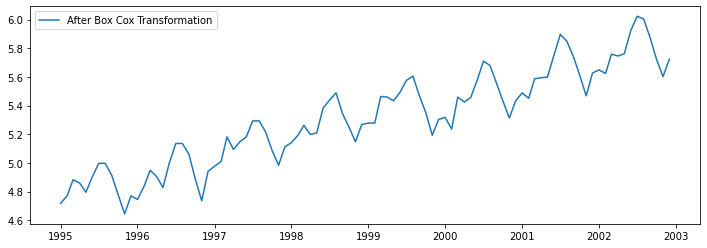

In [51]:
# Plotting the Time series after transformation
plt.figure(figsize=(12,4))
plt.plot(data_boxcox, label='After Box Cox Transformation')
plt.legend(loc='best')
plt.show()

# Differencing

In [53]:
data_boxcox_diff = pd.Series(data_boxcox - data_boxcox.shift(), index=data.index)
data_boxcox_diff # data_boxcox - data_boxcox.shift() :- Performs difference between the previous and current observations.

Month
1995-01-01         NaN
1995-02-01    0.052186
1995-03-01    0.112117
1995-04-01   -0.022990
1995-05-01   -0.064022
                ...   
2002-08-01   -0.019561
2002-09-01   -0.131769
2002-10-01   -0.148533
2002-11-01   -0.121466
2002-12-01    0.121466
Length: 96, dtype: float64

In [54]:
# As the first record becomes null. Hence removing the frist observation.
data_boxcox_diff.dropna(inplace=True)

In [55]:
data_boxcox_diff

Month
1995-02-01    0.052186
1995-03-01    0.112117
1995-04-01   -0.022990
1995-05-01   -0.064022
1995-06-01    0.109484
                ...   
2002-08-01   -0.019561
2002-09-01   -0.131769
2002-10-01   -0.148533
2002-11-01   -0.121466
2002-12-01    0.121466
Length: 95, dtype: float64

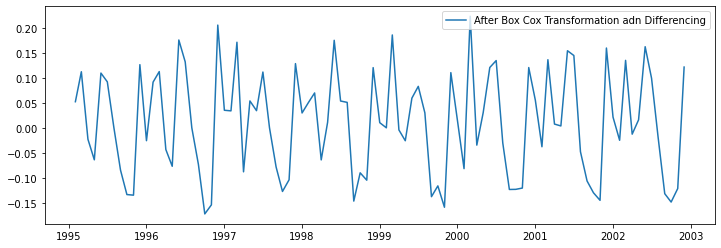

In [56]:
# Plotting the Time series after Box Cox transformation and Differencing
plt.figure(figsize=(12,4))
plt.plot(data_boxcox_diff, label='After Box Cox Transformation adn Differencing')
plt.legend(loc='best')
plt.show()

In [ ]:
#We can see that there is no trend (upward or downward) after differencing on the Box Cox transformation.

# ADF Test

In [57]:
adf_test = adfuller(data_boxcox_diff)
adf_test

(-2.6708228902693527,
 0.07922469056631382,
 12,
 82,
 {'1%': -3.512738056978279,
  '5%': -2.8974898650628984,
  '10%': -2.585948732897085},
 -259.34387684331455)

In [58]:
print('ADF stats: %f' % adf_test[0])
print('p-value: %f' %adf_test[1])
print('Critical value @ 0.05: %.2f' % adf_test[4]['5%'])

ADF stats: -2.670823
p-value: 0.079225
Critical value @ 0.05: -2.90


In [ ]:
# p-value(0.07) ~< critical value(0.05)

# ADF stats < Critical value

In [ ]:
# Hence, Reject the null hypothesis.

# The series is Stationary

#Autocorrelation function (ACF)

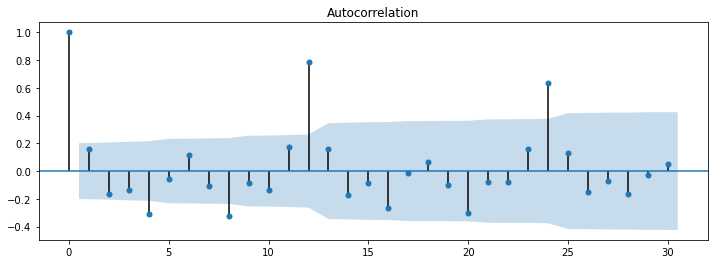

In [59]:
from statsmodels.graphics.tsaplots import plot_acf
plt.figure(figsize=(12,4))
plot_acf(data_boxcox_diff, ax=plt.gca(), lags=30)
plt.show()

#Partial autocorrelation function (PACF)

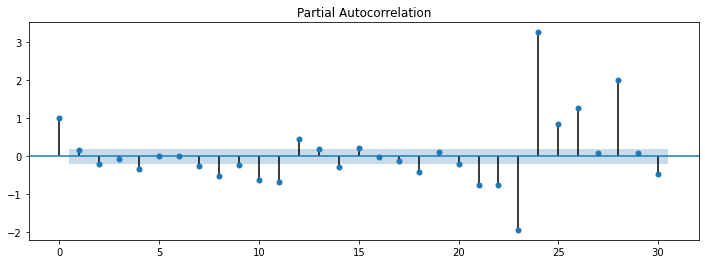

In [60]:
from statsmodels.graphics.tsaplots import plot_pacf
plt.figure(figsize=(12,4))
plot_pacf(data_boxcox_diff, ax=plt.gca(), lags=30)
plt.show()

#dataset into train and test set

In [62]:
# Splitting data_boxcox
train_data_boxcox = data_boxcox[:train_size]
test_data_boxcox = data_boxcox[train_size:]

In [63]:
# Splitting data_boxcox_diff

train_data_boxcox_diff = data_boxcox_diff[:train_size-1]
test_data_boxcox_diff = data_boxcox_diff[train_size-1:]

# Auto Regressive Model (AR)

In [64]:
from statsmodels.tsa.arima_model import ARIMA

In [65]:
model = ARIMA(train_data_boxcox_diff, order=(1,0,0))

In [66]:
model_fit = model.fit()
model_fit.params 

const      0.011745
ar.L1.y    0.114562
dtype: float64

In [ ]:
#The AR model has only one lag or p=1. Hence, we can represent the model as AR(1)

#Forecast

In [81]:
y_hat_ar = data_boxcox_diff.copy()

In [82]:
y_hat_ar['ar_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())

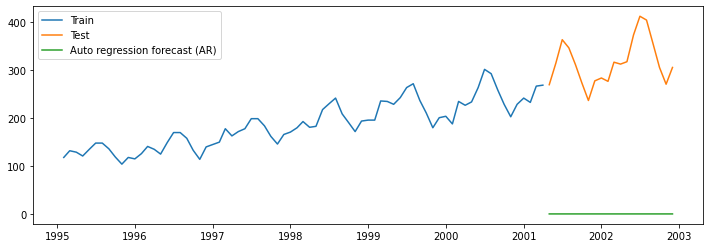

In [83]:
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_ar['ar_forecast_boxcox_diff'][test.index.min():], label='Auto regression forecast (AR)')
plt.legend(loc='best')
plt.show()